# 数据处理流程

## 预处理

## 可视化

#### 柱状图

In [ ]:
import seaborn as sns
%matplotlib inline

#柱状图
df = ...
sns.barplot(x = 'Sex', y = 'Survived', data=train)

#自定义柱状图
labels = ['unkonwn', 'Baby', 'Child', 'Teenager', 'Young adult', 'Adult', 'Senior']
bins = [-1, 0, 5, 12, 18, 24, 25, 60, np.inf]
train['AgeGroup'] = pd.cut(train['Age'], bins, labels = labels)
sns.barplot(x = 'AgeGroup', y = 'Survived', data=train)

## 预处理

#### 缺失值

In [4]:
df = ...

#检查null
pd.isnull(df).sum()

### 字段编码成数字
1. 一般来说取值<10可以one hot

#### One Hot


In [2]:
pd.get_dummies(df, columns = ['education'])

#### LabelEncoder
1.按照字段的顺序（也许是字典序）

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['xxx'] = le.fit_transform(df['country'])  #可以按fit，transform分开
df.head(10)

#### pd.factorize
1. 按照出现的次数

In [ ]:
df['country_LabelEncoder'] = pd.factorize(df['country'])[0]

#### BinartEncoder

In [ ]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols = ['country'])

pd.concat([df, encoder.fit(transform(df['country']).iloc[:,1:])], axis = 1)

#### Counting Encoding

In [ ]:
df['country_count'] = df['country'].map(df['country'].value_counts())

#### Target encoding
使用标签（target）进行编码，比如取某个country（china）对应的target的mean

In [ ]:
df['country_target'] = df['country'].map(df.groupby(['country'])['target'].mean())
df.head()

### 数值类别的特征工程

#### 取整（round）

In [ ]:
df['age_rount1'] = df['age'].round()
df['age_rount2'] = (df['age']/10).astype(int)

### 日期
1. 手动特征提取，比如年/月/日/星期几，是否高峰时段
2. 根据上述特征进行标签编码，比如在星期几固定时的中位数，平均数

 ## 特征筛选

### 基于统计值的特征筛选
1.字段方差（方差大的比较好...但是这个可以scale）

2.缺失值比例

3.分布一致性（在训练集/验证集中分布不一致）

4.离群点

5.标签相关性


#### 方差

In [16]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import load_boston
X = [[0,0,1],[0,1,0],[1,0,0],[0,1,1],[0,1,0],[0,1,1]]
sel = VarianceThreshold(threshold=.8*(1-.8))
sel.fit_transform(X)


data = load_boston()
sel.fit_transform(data.data)
print(data.feature_names[~sel.get_support()])
print(data.feature_names)

['CHAS' 'NOX']
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


### 基于模型的筛选

#### 基于树模型的基尼指数
1.根据字段在节点分裂的信息增益或者基尼指数
2.根据字段被分裂的次数，字段分裂平均深度

[0.03610464 0.00090755 0.00585795 0.00056138 0.02164243 0.46382012
 0.01243879 0.07000646 0.00344634 0.01241758 0.01840493 0.0115689
 0.34282291]


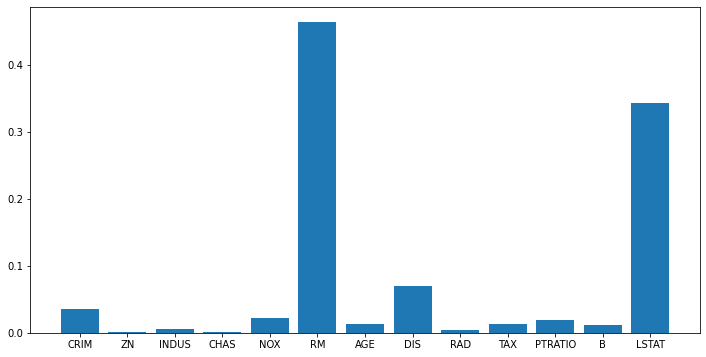

In [12]:
from sklearn.ensemble import RandomForestRegressor 
from matplotlib import pyplot as plt
data = load_boston()

rf = RandomForestRegressor()
rf.fit(data.data, data.target)
print(rf.feature_importances_)

plt.figure(figsize=(12,6))
plt.bar(range(1,14), rf.feature_importances_)
_ = plt.xticks(range(1,14), data.feature_names)

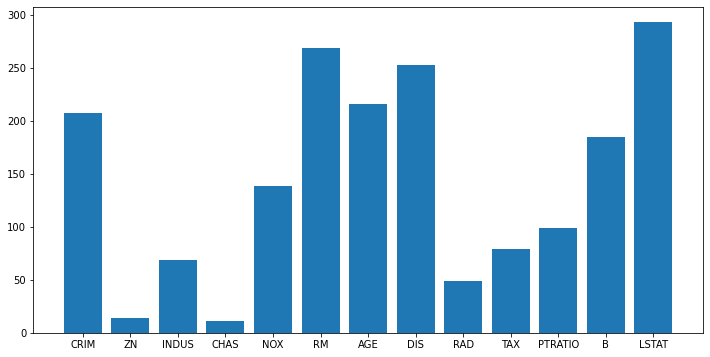

In [10]:
import numpy as np
from lightgbm import LGBMRegressor

clf = LGBMRegressor()
clf.fit(data.data, data.target)

plt.figure(figsize=(12,6))
plt.bar(range(1,14), clf.feature_importances_)
_ = plt.xticks(range(1,14), data.feature_names)

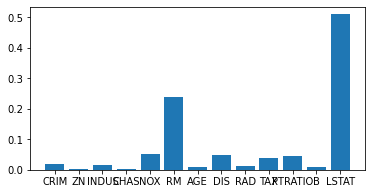

In [14]:
import numpy as np
from xgboost import XGBRegressor

clf = XGBRegressor()
clf.fit(data.data, data.target)

plt.figure(figsize=(6,3))
plt.bar(range(1,14), clf.feature_importances_)
_ = plt.xticks(range(1,14), data.feature_names)

 #### 打散
 1.根据字段打散后对模型影响效果

In [5]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.inspection import permutation_importance
from sklearn.datasets import load_boston
data = load_boston()
clf = RandomForestRegressor().fit(data.data, data.target)
result = permutation_importance(clf, data.data, data.target, n_repeats=10, random_state=0)

In [6]:
result.importances_mean

array([3.84082102e-02, 5.13581742e-04, 5.56628120e-03, 2.85371507e-04,
       4.71941992e-02, 5.37266663e-01, 1.58294336e-02, 1.20446760e-01,
       3.32691017e-03, 1.85968659e-02, 2.95847205e-02, 1.05806315e-02,
       5.38575312e-01])

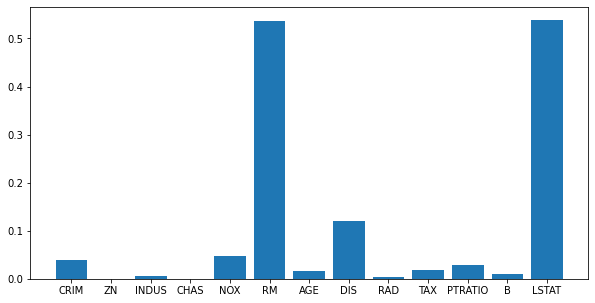

In [11]:
plt.figure(figsize=(10,5))
plt.bar(range(data.data.shape[1]), result.importances_mean)
_ = plt.xticks(range(data.data.shape[1]), data.feature_names)

## K-fold
1. 利用 sklearn.model_selection 里的 StratifiedKFold

## Metrics
1. sklearn.metrics

# Pandas Basic

### Drop


In [ ]:
df.drop(['col1','col2'], axis=1)

# Sklearn Basic

### features selection 特征筛选

In [13]:
from sklearn.feature_selection import VarianceThreshold

### model_selection

In [14]:
from sklearn.model_selection import StratifiedKFold

# Time Series 时间序列

### Dealing With Time Stamp 时间戳

### Seasonality and Trend

### Some Models
1. Arima
2. Prophet
3. Neural Prophet
4. Vector Autoregression (VAR)

### Dataset Construction 数据集构建

In [ ]:
windows_length = 5
dataset = tf.data.Dataset.from_tensor_slices(df_train)
dataset = dataset.window(windows_length, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(windows_length))
dataset = dataset.map(lambda window: (window[:,:-1], window[-1][-1]))